In [5]:
# Core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model loading and explainability
import joblib
import shap

# Optional: improve visualization style
sns.set_style("whitegrid")


In [6]:
# Load preprocessed dataset
df = pd.read_csv("../data/processed/processed.csv")

# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

# Quick check
X.head()


,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,gender_M
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
# Load previously trained Random Forest model
model = joblib.load("../models/best_model.joblib")


In [11]:
# Use the model's predict_proba function for binary classification
explainer = shap.Explainer(
    model.predict_proba,  # tell SHAP how to call the model
    X                     # background dataset
)

# Compute SHAP values
shap_values = explainer(X)

PermutationExplainer explainer: 521it [05:35,  1.53it/s]                         


C:\Users\alanm\AppData\Local\Temp\ipykernel_12064\2498772972.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values[:,:,1], X, plot_type="bar")


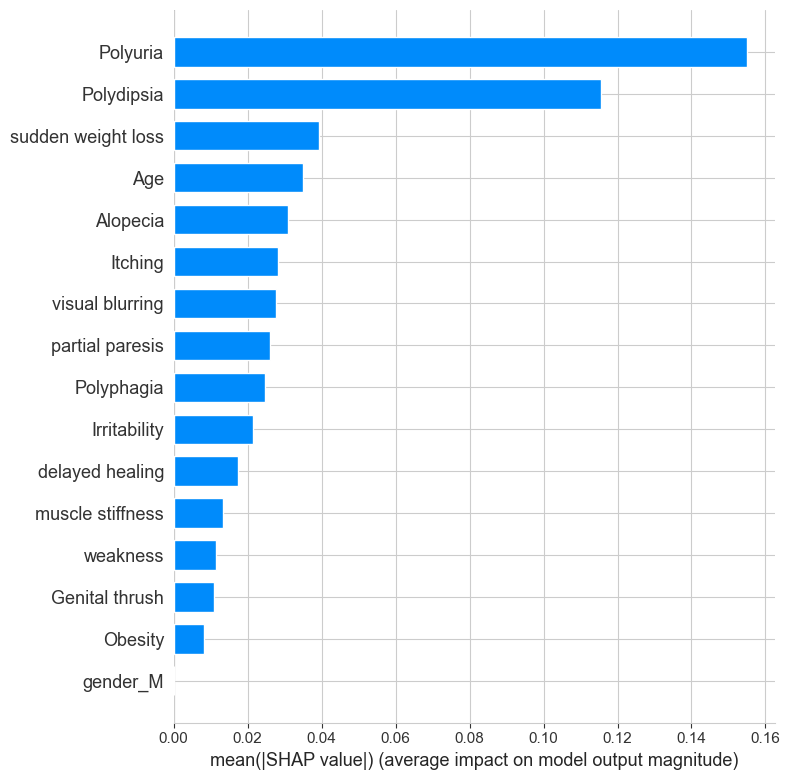

In [13]:
# For class 1 (positive diabetes risk)
shap.summary_plot(shap_values.values[:,:,1], X, plot_type="bar")


C:\Users\alanm\AppData\Local\Temp\ipykernel_12064\3629678342.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values[:,:,1], X)


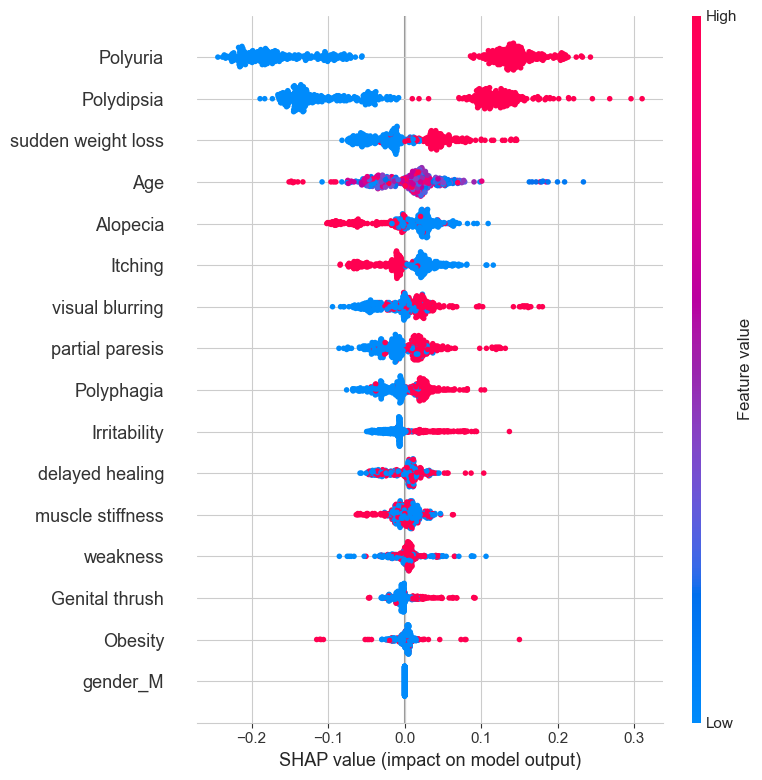

In [14]:
# Beeswarm plot: impact of each feature across all samples
shap.summary_plot(shap_values.values[:,:,1], X)

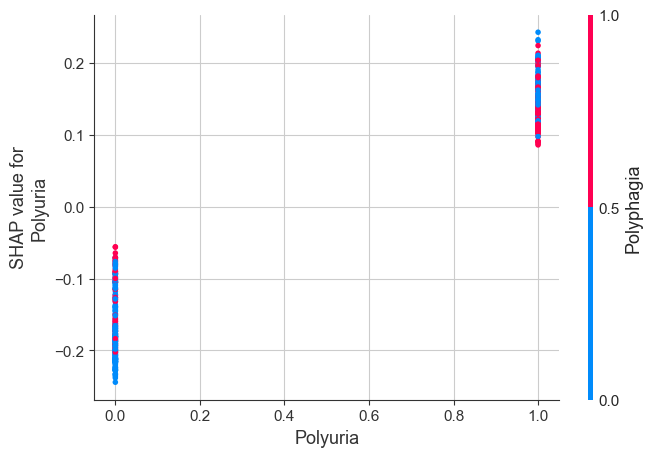

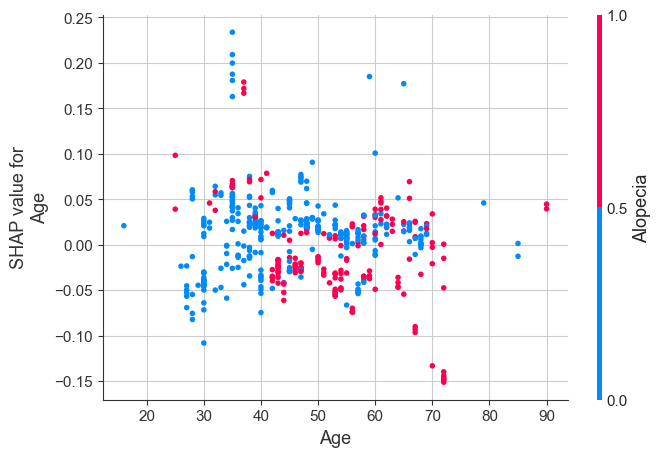

In [16]:
import numpy as np

# Find top 3 features by mean absolute SHAP value
mean_abs_shap = np.abs(shap_values[:,1].values).mean(axis=0)
top_features = X.columns[np.argsort(mean_abs_shap)[-3:]]

# Create dependence plots for top 3 features
for feature in top_features:
    shap.dependence_plot(feature, shap_values.values[:,:,1], X)

In [18]:
# Initialize JS visualization
shap.initjs()

# Choose a sample index
i = 0

# Force plot for a single sample (class 1)
shap.force_plot(
    base_value=shap_values.base_values[i,1],   # baseline for class 1
    shap_values=shap_values.values[i,:,1],     # SHAP contributions for class 1
    features=X.iloc[i]                         # feature values
)